# Marketing Campaign Effectiveness Analysis

In [22]:
# import library
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# loading dataset
df = pd.read_csv("..//Python coding//email_c.csv")
df.head()

,Campaign,CTR
0,A,0.034967
1,A,0.028617
2,A,0.036477
3,A,0.045230
4,A,0.027658


In [24]:
# Summary stats
df.describe()

,CTR
count,500.000000
mean,0.035068
std,0.011057
min,0.003803
25%,0.027603
50%,0.034431
75%,0.042002
max,0.070789


In [25]:
# Checking how many values in Campaign column
df["Campaign"].value_counts()

Campaign
A    250
B    250
Name: count, dtype: int64

### Calculating the mean for both groups, A and B

In [26]:
# Grouping the values in the Campaign column to calculate the mean - Group A
# A = df.groupby("Campaign")["CTR"].sum()
# A

# Grouping the values in the Campaign column to calculate the mean - Group A
A = df.groupby("Campaign")["CTR"].mean().loc["A"]
A = round(A, 5)
print(F"Group A mean: {A}")

Group A mean: 0.02998


In [27]:
# Grouping the values in the Campaign column to calculate the mean - Group B
# B = df.groupby("Campaign")["CTR"].sum()
# B

# Grouping the values in the Campaign column to calculate the mean - Group B
B = df.groupby("Campaign")["CTR"].mean().loc["B"]
B = round(B, 5)
print(F"Group B mean: {B}")

Group B mean: 0.04016


### Calculating the standard deviation for both groups, A and B

In [28]:
# Calculating the standard deviation for group A and group B
std_A = df.groupby("Campaign")["CTR"].std().loc["A"]
std_A = round(std_A, 5)
print(F"Group A Std: {std_A}")

std_B = df.groupby("Campaign")["CTR"].std().loc["B"]
std_B = round(std_B, 5)
print(F"Group B Std: {std_B}")

Group A Std: 0.00966
Group B Std: 0.00998


### Getting the sample size for both groups, A and B

In [29]:
# Getting the sample size for group A and group B
sample_A = df.groupby("Campaign")["CTR"].count().loc["A"]
print(F"Sample size for group A: {sample_A}")

sample_B = df.groupby("Campaign")["CTR"].count().loc["A"]
print(F"Sample size for group A: {sample_B}")

Sample size for group A: 250
Sample size for group A: 250


### Extracting individual CTR values for both groups, A and B

In [30]:
# Extracting individual CTR values for Campaign A and Campaign B
A_CTR = df[df["Campaign"] == "A"]["CTR"]
B_CTR = df[df["Campaign"] == "B"]["CTR"]
print(f"Group A CTR Values: {A_CTR}")
print(f"Group B CTR Values: {B_CTR}")

Group A CTR Values: 0      0.034967
1      0.028617
2      0.036477
3      0.045230
4      0.027658
         ...   
245    0.026655
246    0.025251
247    0.023467
248    0.047655
249    0.034050
Name: CTR, Length: 250, dtype: float64
Group B CTR Values: 250    0.027391
251    0.049179
252    0.061222
253    0.050325
254    0.024806
         ...   
495    0.045389
496    0.029628
497    0.038097
498    0.031244
499    0.026172
Name: CTR, Length: 250, dtype: float64


### Performing t-test and p-value for both groups, A and B

In [31]:
from scipy.stats import ttest_ind

# Perform t-test using the CTR values for Campaign A and B
t_stat, p_value = ttest_ind(A_CTR, B_CTR)

print(f"T-Statistic: {round(t_stat, 2)}")
print(f"P-Value: {round(p_value, 2)}")

T-Statistic: -11.59
P-Value: 0.0


### **Testing Interpretation**

#### **T-Statistic** = -11.59 indicates a significant difference between the two groups A and B.

#### **P-Value** = 0.0, which is far below the threshold of 0.05
#### Since the p-value is far below 0.05, we can confidently **reject the null hypothesis**, which states that there is no difference in the mean CTR between Campaign A and Campaign B.


#### In summary, this testing shows Campaign B has a significantly higher click-through rate (CTR) than Campaign A.

## **Calculating the Effect Size Between Campaign A and B**

### Steps I took:
* #### Calculated the mean for each of the two groups
* #### Calculated the variance for each of the two groups
* #### Calculated the pooled standard deviation based on the variance for both gorups
* #### Calculated the Cohen's d effect size using this formula (group a mean - group b mean  divided by the pooled standard deviation).

In [32]:
# Calculating the mean for group A
mean_A = df.groupby("Campaign")["CTR"].mean().loc["A"]
mean_A = round(mean_A, 5) # rounded group A mean to 5 dp
print(f"Group A Mean: {mean_A}")

Group A Mean: 0.02998


In [33]:
# Calculating the mean for group B
mean_B = df.groupby("Campaign")["CTR"].mean().loc["B"]
mean_B = round(mean_B, 5) # rounded group B mean to 5 dp
print(f"Group B Mean: {mean_B}")

Group B Mean: 0.04016


### Plotting the Mean CTR for Each Campaign

In [43]:
# Data for plotting the means
campaigns = ["Campaign A", "Campaign B"]
ctr_means = [mean_A, mean_B]

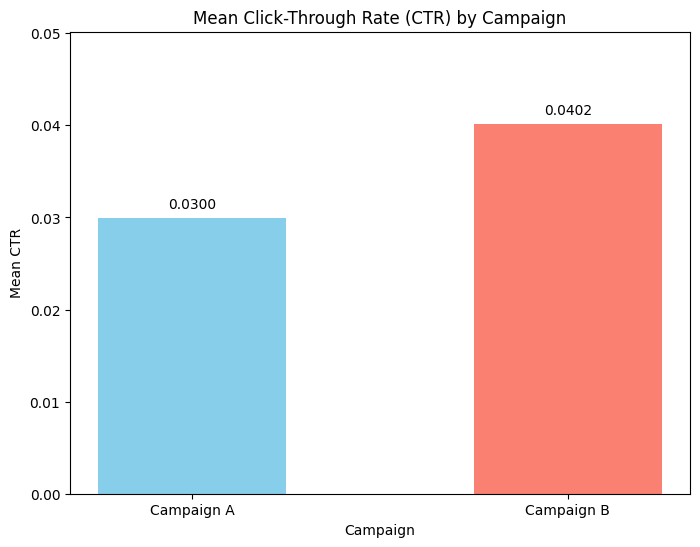

In [50]:
# Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(campaigns, ctr_means, color=["skyblue", "salmon"], width=0.5)
plt.title("Mean Click-Through Rate (CTR) by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Mean CTR")
plt.ylim(0, max(ctr_means) + 0.01)  # Adjust y-axis for better visibility
plt.text(0, mean_A + 0.001, f"{mean_A:.4f}", ha="center", color="black") # additional text on top of bars
plt.text(1, mean_B + 0.001, f"{mean_B:.4f}", ha="center", color="black") # additional text on top of bars

# Show plot
plt.show()

In [34]:
# Calculating the variance for group A
var_A = df.groupby("Campaign")["CTR"].var().loc["A"]
# var_A = round(var_A, 5) # rounded group A variance to 5 dp
print(f"Group A Variance: {var_A}")

Group A Variance: 9.332597432331495e-05


In [35]:
# Calculating the variance for group B
var_B = df.groupby("Campaign")["CTR"].var().loc["B"]
# var_B = round(var_B, 5) # rounded group B variance to 5 dp
print(f"Group B Variance: {var_B}")

Group B Variance: 9.961508096631272e-05


In [36]:
# Calculating the pooled standard deviation using the variance of group A and B
#importing math module - required for this calculation
import math
std_A_B = math.sqrt((var_A + var_B) / 2)
std_A_B = round(std_A_B, 5) # rounded the 2 groups std to 5 dp
print(f"Pooled Standard Deviation for Group A and B: {std_A_B}")

Pooled Standard Deviation for Group A and B: 0.00982


In [37]:
# Calculating the Cohen's d for the effect size of both group A and B campaigns
cohen_d = (mean_A - mean_B) / std_A_B
print(F"The cohen's d for the 2 groups is: {round(cohen_d, 4)}")

The cohen's d for the 2 groups is: -1.0367


## Cohen's d Effect Size Interpretation

### Which campaign was more effective?
* #### For the marketing campaings groups of A and B, the **effect size of -1.0367** has helped me to conclude that Campaign B was significantly more effective because it has a higher mean CTR than campaign A.

* #### My advice to the marketing company would be to consider focusing more resources towards campaign B because it was more effective than campaign A. On the other hand, they can borrow strategies from campaign B and use it towards improving the CTR of campaign A.